# Working out ML model to evaluate price of property

### Our dataset

In [53]:
import pandas as pd
df = pd.read_csv('data.csv')
# drop cash column
df = df.drop(columns=['Cash'])
df

,Street Address,Township,Erf I Portion,Sales Date,Reg Date,Sales Price,Size,R/m^2,Distance,Bedroom,Bath,Garage,HomeM
0,214 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,594 0,20211018,20220128.0,R 1200000,495,R 2 424,94,7.0,7.0,2,300
1,77 9TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,987 0,20220110,20220215.0,R 950 000,495,R 919,123,NaN,NaN,NaN,-
2,212 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,592 0,20210716,20220309.0,R 1 200 000,495,R 2 424,103,3.0,2.0,1,-
3,225 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,605 0,20210803,20211025.0,R 1 075 000,495,R2 172,69,3.0,2.0,-,-
4,193 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,573 0,20211214,NaN,R 1 500 000,495,R3030,248,3.0,2.5,NaN,200
5,276 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,942 0,20220520,NaN,R 1 350 000,495,R 2727,478,1.0,3.0,1,221
6,122 9TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1123 0,20211218,20220316.0,R 1 225 000,495,R 2475,407,3.0,3.0,1,-
7,17 ORLANDO STREET KENSINGTON,KENSINGTON,2515 0,20220121,20220328.0,R 1 280 000,495,R 2 586,442,3.0,3.0,1,237
8,224 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,890 0,20201224,20210407.0,R 1 250 000,495,R 2525,32,4.0,2.0,1,-
9,66 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,977 0,20211021,20211210.0,R 1 420 000,495,R 2 869,290,3.0,0.0,NaN,264


### Cleaning up dataset only using data where we got HomeM values

In [54]:
# drop df where HomeM is -
df = df[df['HomeM'] != '-']
df
# drop index
df = df.reset_index(drop=True)
df

,Street Address,Township,Erf I Portion,Sales Date,Reg Date,Sales Price,Size,R/m^2,Distance,Bedroom,Bath,Garage,HomeM
0,214 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,594 0,20211018,20220128.0,R 1200000,495,R 2 424,94,7.0,7.0,2,300
1,193 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,573 0,20211214,NaN,R 1 500 000,495,R3030,248,3.0,2.5,NaN,200
2,276 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,942 0,20220520,NaN,R 1 350 000,495,R 2727,478,1.0,3.0,1,221
3,17 ORLANDO STREET KENSINGTON,KENSINGTON,2515 0,20220121,20220328.0,R 1 280 000,495,R 2 586,442,3.0,3.0,1,237
4,66 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,977 0,20211021,20211210.0,R 1 420 000,495,R 2 869,290,3.0,0.0,NaN,264
5,40 10TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1148 0,20210803,20211112.0,R 1 100 000,495,R 2 222,231,3.0,2.0,1,180
6,64 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,976 0,20210714,20211102.0,R1 250 000,495,R 2525,304,6.0,6.0,NaN,218
7,2 7TH STREET BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1131 0,20210806,20211115.0,R 1 300 000,495,R 2626,322,4.0,1.0,1,269
8,258 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,638,20210618,20210906.0,R1 250 000,495,R 2525,328,2.0,1.0,NaN,97
9,83 10TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1104 0,20210919,20220309.0,R 950000,495,R 919,297,3.0,3.0,1,105


### Calculating R/HomeM Column

In [55]:
# calc Sales Price / HomeM
# convert Sales Price to float
df['Sales Price'] = df['Sales Price'].str.replace('R','')
# remove spaces from Sales Price
df['Sales Price'] = df['Sales Price'].str.replace(' ','')
df['R/HomeM'] = df['Sales Price'].astype(float) / df['HomeM'].astype(float)
df

,Street Address,Township,Erf I Portion,Sales Date,Reg Date,Sales Price,Size,R/m^2,Distance,Bedroom,Bath,Garage,HomeM,R/HomeM
0,214 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,594 0,20211018,20220128.0,1200000,495,R 2 424,94,7.0,7.0,2,300,4000.000000
1,193 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,573 0,20211214,NaN,1500000,495,R3030,248,3.0,2.5,NaN,200,7500.000000
2,276 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,942 0,20220520,NaN,1350000,495,R 2727,478,1.0,3.0,1,221,6108.597285
3,17 ORLANDO STREET KENSINGTON,KENSINGTON,2515 0,20220121,20220328.0,1280000,495,R 2 586,442,3.0,3.0,1,237,5400.843882
4,66 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,977 0,20211021,20211210.0,1420000,495,R 2 869,290,3.0,0.0,NaN,264,5378.787879
5,40 10TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1148 0,20210803,20211112.0,1100000,495,R 2 222,231,3.0,2.0,1,180,6111.111111
6,64 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,976 0,20210714,20211102.0,1250000,495,R 2525,304,6.0,6.0,NaN,218,5733.944954
7,2 7TH STREET BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1131 0,20210806,20211115.0,1300000,495,R 2626,322,4.0,1.0,1,269,4832.713755
8,258 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,638,20210618,20210906.0,1250000,495,R 2525,328,2.0,1.0,NaN,97,12886.597938
9,83 10TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1104 0,20210919,20220309.0,950000,495,R 919,297,3.0,3.0,1,105,9047.619048


### Average R/HomeM

In [56]:
print('R' + str(df['R/HomeM'].mean())) 
#248 495

R6429.284178520146


### Seperating Erf and Portion into seperate columns

In [57]:
df['Erf'] = df['Erf I Portion'].str.split(' ').str[0]
df['Portion'] = df['Erf I Portion'].str.split(' ').str[1]
df

,Street Address,Township,Erf I Portion,Sales Date,Reg Date,Sales Price,Size,R/m^2,Distance,Bedroom,Bath,Garage,HomeM,R/HomeM,Erf,Portion
0,214 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,594 0,20211018,20220128.0,1200000,495,R 2 424,94,7.0,7.0,2,300,4000.000000,594,0
1,193 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,573 0,20211214,NaN,1500000,495,R3030,248,3.0,2.5,NaN,200,7500.000000,573,0
2,276 8TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,942 0,20220520,NaN,1350000,495,R 2727,478,1.0,3.0,1,221,6108.597285,942,0
3,17 ORLANDO STREET KENSINGTON,KENSINGTON,2515 0,20220121,20220328.0,1280000,495,R 2 586,442,3.0,3.0,1,237,5400.843882,2515,0
4,66 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,977 0,20211021,20211210.0,1420000,495,R 2 869,290,3.0,0.0,NaN,264,5378.787879,977,0
5,40 10TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1148 0,20210803,20211112.0,1100000,495,R 2 222,231,3.0,2.0,1,180,6111.111111,1148,0
6,64 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,976 0,20210714,20211102.0,1250000,495,R 2525,304,6.0,6.0,NaN,218,5733.944954,976,0
7,2 7TH STREET BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1131 0,20210806,20211115.0,1300000,495,R 2626,322,4.0,1.0,1,269,4832.713755,1131,0
8,258 7TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,638,20210618,20210906.0,1250000,495,R 2525,328,2.0,1.0,NaN,97,12886.597938,638,NaN
9,83 10TH AVENUE BEZUIDENHOUT VALLEY,BEZUIDENHOUT VALLEY,1104 0,20210919,20220309.0,950000,495,R 919,297,3.0,3.0,1,105,9047.619048,1104,0


# Replace all NaNs to 0

In [58]:
df = df.fillna(0)

### Building machine learning model to predict price of property using `HomeM,Erf,Bedroom,Garage,Bathroom`

In [59]:
!pip3 install sklearn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


### Predicting price of 220 8th Avenue property

In [60]:
# use polynomial linear regression to predict home sales price
from sklearn.linear_model import LinearRegression
X = df[['HomeM','Erf','Bedroom','Garage','Bath']]
y = df['Sales Price']
model = LinearRegression()
model.fit(X,y)
# predict home sales price
prediction = model.predict([[248,495,5,1,4]])[0]
prediction = round(prediction,2)

print('R',prediction)
print("Model Accuracy is :",model.score(X,y))

R 1251315.92
Model Accuracy is : 0.7149720907585728


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Running our model on the actual sales price

In [61]:
# iterate through all the data and predict home sales price
# create a new dataframe to store the predicted values
df_predicted = pd.DataFrame(columns=['Street Address','HomeM','Erf','Bedroom','Garage','Bath','Actual Sale Price','Predicted Sale Price'])
for i in range(len(df)):
    # convert all values to numeric
    df['HomeM'][i] = df['HomeM'][i].replace('R','')
    df['HomeM'][i] = df['HomeM'][i].replace(' ','')
    df['HomeM'][i] = float(df['HomeM'][i])
    df['Erf'][i] = df['Erf'][i].replace(' ','')
    df['Erf'][i] = float(df['Erf'][i])
    df['Bedroom'][i] = float(df['Bedroom'][i])
    df['Garage'][i] = float(df['Garage'][i])
    df['Bath'][i] = float(df['Bath'][i])
    df['Sales Price'][i] = df['Sales Price'][i].replace('R','')
    df['Sales Price'][i] = df['Sales Price'][i].replace(' ','')
    df['Sales Price'][i] = float(df['Sales Price'][i])
    # predict home sales price
    prediction = model.predict([[df['HomeM'][i],df['Erf'][i],df['Bedroom'][i],df['Garage'][i],df['Bath'][i]]])[0]
    prediction = round(prediction,2)
    # append to dataframe
    df_predicted = df_predicted.append({'Street Address':df['Street Address'][i],'HomeM':df['HomeM'][i],'Erf':df['Erf'][i],'Bedroom':df['Bedroom'][i],'Garage':df['Garage'][i],'Bath':df['Bath'][i],'Actual Sale Price':df['Sales Price'][i],'Predicted Sale Price':prediction},ignore_index=True)

df_predicted    

C:\Users\ADGSENPAI\AppData\Local\Temp\ipykernel_31848\1045623906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HomeM'][i] = df['HomeM'][i].replace('R','')
C:\Users\ADGSENPAI\AppData\Local\Temp\ipykernel_31848\1045623906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HomeM'][i] = df['HomeM'][i].replace(' ','')
C:\Users\ADGSENPAI\AppData\Local\Temp\ipykernel_31848\1045623906.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Street Address,HomeM,Erf,Bedroom,Garage,Bath,Actual Sale Price,Predicted Sale Price
0,214 7TH AVENUE BEZUIDENHOUT VALLEY,300.0,594.0,7.0,2.0,7.0,1200000.0,1136949.61
1,193 8TH AVENUE BEZUIDENHOUT VALLEY,200.0,573.0,3.0,0.0,2.5,1500000.0,1375792.99
2,276 8TH AVENUE BEZUIDENHOUT VALLEY,221.0,942.0,1.0,1.0,3.0,1350000.0,1311757.93
3,17 ORLANDO STREET KENSINGTON,237.0,2515.0,3.0,1.0,3.0,1280000.0,1195158.11
4,66 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,264.0,977.0,3.0,0.0,0.0,1420000.0,1438484.61
5,40 10TH AVENUE BEZUIDENHOUT VALLEY,180.0,1148.0,3.0,1.0,2.0,1100000.0,1161445.67
6,64 ALBERTINA SISULU ROAD BEZUIDENHOUT VALLEY,218.0,976.0,6.0,0.0,6.0,1250000.0,1313778.49
7,2 7TH STREET BEZUIDENHOUT VALLEY,269.0,1131.0,4.0,1.0,1.0,1300000.0,1263275.45
8,258 7TH AVENUE BEZUIDENHOUT VALLEY,97.0,638.0,2.0,0.0,1.0,1250000.0,1228893.52
9,83 10TH AVENUE BEZUIDENHOUT VALLEY,105.0,1104.0,3.0,1.0,3.0,950000.0,1051638.01


#### Plotting Graph

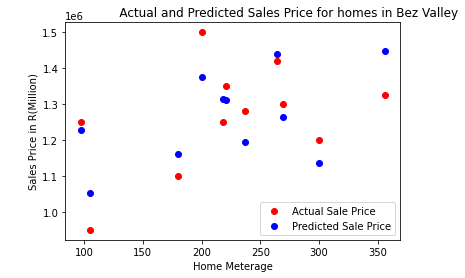

In [78]:
import matplotlib.pyplot as plt
plt.scatter(df_predicted['HomeM'],df_predicted['Actual Sale Price'],color='red')
plt.scatter(df_predicted['HomeM'],df_predicted['Predicted Sale Price'],color='blue')
plt.xlabel('Home Meterage')
plt.ylabel('Sales Price in R(Million)')
plt.title('                             Actual and Predicted Sales Price for homes in Bez Valley')
# add a legend
plt.legend(['Actual Sale Price','Predicted Sale Price'])
plt.show()

### For fun how much our Somerset Home Specs would sell for in Bez Valley

In [79]:
#HomeM,Erf,Bedroom,Garage,Bathroom"
prediction = model.predict([[1028,414,5,3,4]])[0]
prediction = round(prediction,2)
print('R',prediction)

R 2202585.72


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
